In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.interpolate import interp1d
from scipy.stats import sem, t
from scipy.sparse import csr_matrix, coo_matrix

In [ ]:
natalidad = pd.read_csv('natalidad.csv')
natalidad['Porcentaje'] = natalidad['Porcentaje'].str.replace(',', '.').astype(float)
natalidad['Tasa de Natalidad'] = natalidad['Tasa de Natalidad'].str.replace(',', '.').astype(float)
natalidad

,Edad de la madre,Porcentaje,año,Tasa de Natalidad(x1000),Tasa de Natalidad
0,1.Menor de 15,0.378782,2005,"18,4550485007962",0.018455
1,2.15 a 19,14.673790,2005,"18,4550485007962",0.018455
2,3.20 a 24,24.986377,2005,"18,4550485007962",0.018455
3,4.25 a 29,25.688179,2005,"18,4550485007962",0.018455
4,5.30 a 34,19.918583,2005,"18,4550485007962",0.018455
...,...,...,...,...,...
157,5.30 a 34,23.263043,2022,"10,7125948121795",0.010713
158,6.35 a 39,15.023824,2022,"10,7125948121795",0.010713
159,7.40 a 44,4.556256,2022,"10,7125948121795",0.010713
160,8.De 45 y más,0.400860,2022,"10,7125948121795",0.010713


In [ ]:
natalidad['Tasa por grupo'] = (natalidad['Porcentaje'] / 100) * natalidad['Tasa de Natalidad']
natalidad

,Edad de la madre,Porcentaje,año,Tasa de Natalidad(x1000),Tasa de Natalidad,Tasa por grupo
0,1.Menor de 15,0.378782,2005,"18,4550485007962",0.018455,0.000070
1,2.15 a 19,14.673790,2005,"18,4550485007962",0.018455,0.002708
2,3.20 a 24,24.986377,2005,"18,4550485007962",0.018455,0.004611
3,4.25 a 29,25.688179,2005,"18,4550485007962",0.018455,0.004741
4,5.30 a 34,19.918583,2005,"18,4550485007962",0.018455,0.003676
...,...,...,...,...,...,...
157,5.30 a 34,23.263043,2022,"10,7125948121795",0.010713,0.002492
158,6.35 a 39,15.023824,2022,"10,7125948121795",0.010713,0.001609
159,7.40 a 44,4.556256,2022,"10,7125948121795",0.010713,0.000488
160,8.De 45 y más,0.400860,2022,"10,7125948121795",0.010713,0.000043


In [ ]:
df_natalidad = natalidad.pivot(index='año', columns='Edad de la madre', values='Tasa por grupo')
df_natalidad = df_natalidad.sort_index(axis=1)
df_natalidad

Edad de la madre,1.Menor de 15,2.15 a 19,3.20 a 24,4.25 a 29,5.30 a 34,6.35 a 39,7.40 a 44,8.De 45 y más,9.Sin especificar
año,,,,,,,,,
2005,0.000070,0.002708,0.004611,0.004741,0.003676,0.001898,0.000554,0.000041,0.000156
2006,0.000071,0.002667,0.004476,0.004544,0.003570,0.001879,0.000510,0.000038,0.000117
2007,0.000072,0.002713,0.004442,0.004467,0.003546,0.001870,0.000506,0.000038,0.000152
2008,0.000074,0.002821,0.004613,0.004658,0.003874,0.002021,0.000524,0.000041,0.000155
2009,0.000083,0.002827,0.004555,0.004461,0.003877,0.002030,0.000520,0.000039,0.000179
2010,0.000077,0.002824,0.004553,0.004316,0.003965,0.002090,0.000527,0.000040,0.000271
2011,0.000077,0.002833,0.004549,0.004232,0.003948,0.002132,0.000554,0.000041,0.000169
2012,0.000073,0.002696,0.004389,0.004001,0.003789,0.002105,0.000548,0.000036,0.000248
2013,0.000077,0.002706,0.004401,0.004048,0.003748,0.002160,0.000548,0.000036,0.000156


In [ ]:
df_natalidad = df_natalidad.loc[2010:]
df_natalidad = df_natalidad.drop('9.Sin especificar', axis=1)
df_natalidad.columns = df_natalidad.columns.str.replace(r'^\d+\.', '', regex=True)
df_natalidad

Edad de la madre,Menor de 15,15 a 19,20 a 24,25 a 29,30 a 34,35 a 39,40 a 44,De 45 y más
año,,,,,,,,
2010,0.000077,0.002824,0.004553,0.004316,0.003965,0.002090,0.000527,0.000040
2011,0.000077,0.002833,0.004549,0.004232,0.003948,0.002132,0.000554,0.000041
2012,0.000073,0.002696,0.004389,0.004001,0.003789,0.002105,0.000548,0.000036
2013,0.000077,0.002706,0.004401,0.004048,0.003748,0.002160,0.000548,0.000036
2014,0.000071,0.002671,0.004512,0.004156,0.003754,0.002241,0.000570,0.000038
2015,0.000065,0.002529,0.004402,0.004072,0.003600,0.002288,0.000587,0.000041
2016,0.000056,0.002226,0.004091,0.003914,0.003434,0.002226,0.000581,0.000044
2017,0.000057,0.002084,0.003850,0.003768,0.003246,0.002106,0.000539,0.000039
2018,0.000053,0.001909,0.003705,0.003674,0.003167,0.002058,0.000559,0.000043


In [ ]:
def graficar_porcentaje_por_edad(df, n_columnas):

    n_filas = (len(df.columns) + n_columnas - 1) // n_columnas

    fig, axes = plt.subplots(n_filas, n_columnas, figsize=(15, 5 * n_filas))
    axes = axes.flatten()

    for idx, edad in enumerate(df.columns):
        ax = axes[idx]
        ax.bar(df.index, df[edad], color='skyblue', edgecolor='black')

        promedio = df[edad].mean()
        ax.axhline(promedio, color='red', linestyle='--', linewidth=2, label=f'Promedio: {promedio:.5f}')

        ax.set_title(f'Evolución de la tasa para el rango de {edad} años')
        ax.set_xlabel('Año')
        ax.set_ylabel('Tasa')
        ax.grid(axis='y', linestyle='--', alpha=0.7)
        ax.set_xticks(df.index)
        ax.set_xticklabels(df.index, rotation=45, ha='right')

        ax.legend()

    for j in range(idx + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


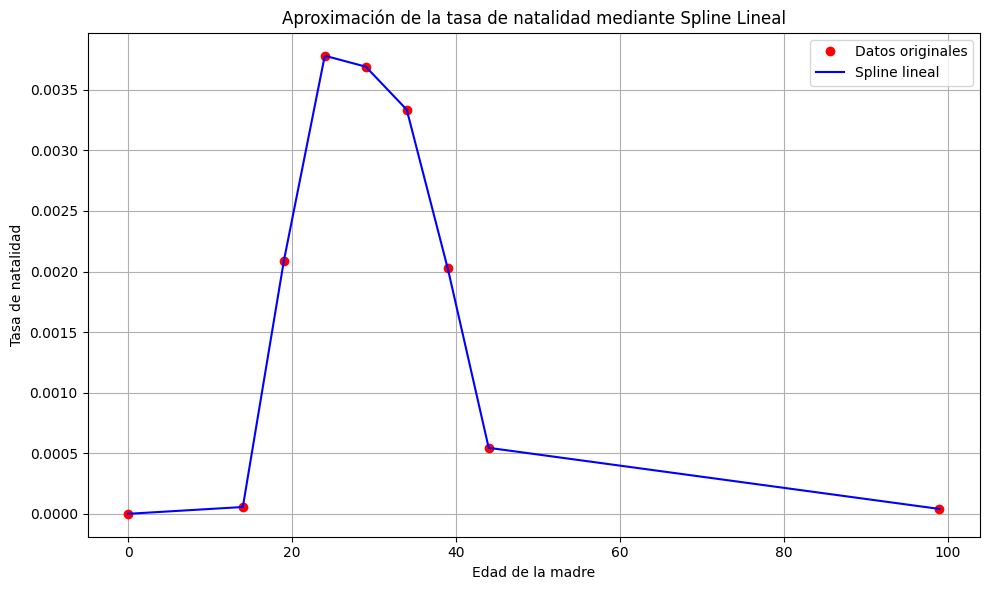

In [ ]:
edades_natalidad = [0, 14, 19, 24, 29, 34, 39, 44, 99]
tasas_medias_natalidad = df_natalidad.mean().tolist()
tasas_medias_natalidad.insert(0, 0)

interpolacion_lineal = interp1d(edades_natalidad, tasas_medias_natalidad, kind='linear')

edad_fina = np.linspace(min(edades_natalidad), max(edades_natalidad), 1000)
tasas_finas = interpolacion_lineal(edad_fina)

plt.figure(figsize=(10, 6))
plt.plot(edades_natalidad, tasas_medias_natalidad, 'o', label='Datos originales', color='red')
plt.plot(edad_fina, tasas_finas, '-', label='Spline lineal', color='blue')
plt.xlabel('Edad de la madre')
plt.ylabel('Tasa de natalidad')
plt.title('Aproximación de la tasa de natalidad mediante Spline Lineal')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
def natalidad_lineal(edad):

    edades = [0, 14, 19, 24, 29, 34, 39, 44, 100]
    tasas = tasas_medias_natalidad.copy()

    interpolacion_lineal = interp1d(edades, tasas, kind='linear')

    return interpolacion_lineal(edad)

In [ ]:
edad = np.random.random()*100
tasa = natalidad_lineal(edad)
print(f"La tasa de natalidad para la edad {edad} es {tasa}")


La tasa de natalidad para la edad 23.512821698645148 es 0.0036162458824457898


In [ ]:
mortalidad = pd.read_csv('mortalidad.csv')
mortalidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   año                          18 non-null     int64 
 1   TOTAL                        18 non-null     int64 
 2   Menores de 1                 18 non-null     int64 
 3   1 a 4                        18 non-null     int64 
 4   5 a 9                        18 non-null     int64 
 5   10 a 14                      18 non-null     int64 
 6   15 a 19                      18 non-null     int64 
 7   20 a 24                      18 non-null     int64 
 8   25 a 29                      18 non-null     int64 
 9   30 a 34                      18 non-null     int64 
 10  35 a 39                      18 non-null     int64 
 11  40 a 44                      18 non-null     int64 
 12  45 a 49                      18 non-null     int64 
 13  50 a 54                      18 non-n

In [ ]:
mortalidad['tasa de mortalidad'] = mortalidad['tasa de mortalidad'].str.replace(',', '.').astype(float)
mortalidad

,año,TOTAL,Menores de 1,1 a 4,5 a 9,10 a 14,15 a 19,20 a 24,25 a 29,30 a 34,...,55 a 59,60 a 64,65 a 69,70 a 74,75 a 79,80 a 84,85 y más,Sin especificar,tasa de mortalidad(x100000),tasa de mortalidad
0,2005,293529,9507,1539,901,1028,2370,2991,3050,3089,...,15829,20497,25203,32784,40544,42559,62311,762,"760,6",0.007606
1,2006,292313,8986,1590,892,1083,2398,2987,3142,3191,...,16091,20714,24796,31690,40298,42532,62858,525,"750,1",0.007501
2,2007,315852,9300,1612,804,1107,2551,3088,3333,3387,...,17006,21982,26979,33266,43162,46604,71501,768,"760,2",0.007602
3,2008,302133,9341,1517,846,1031,2696,3299,3452,3532,...,16651,21305,26103,31227,39833,44166,67274,791,"802,5",0.008025
4,2009,304525,9026,1483,863,1025,2708,3364,3494,3742,...,16833,21783,26128,31093,39177,44135,68874,1295,"758,8",0.007588
5,2010,318602,8961,1446,739,986,2618,3394,3267,3721,...,16800,22250,27045,32660,40364,46974,78085,901,"786,3",0.007863
6,2011,319059,8878,1347,762,1002,2832,3406,3365,3696,...,16533,22319,27474,32456,39544,46777,79126,774,"780,1",0.007801
7,2012,319539,8227,1370,690,915,2898,3675,3361,3896,...,16980,22666,28211,32927,38189,46609,79301,896,774,0.007740
8,2013,326197,8174,1357,702,902,2964,3733,3441,3834,...,16755,23448,28861,33182,38538,47155,83185,703,"772,9",0.007729
9,2014,325539,8202,1278,710,900,2905,3714,3445,3737,...,16606,22831,28663,33706,38741,46539,84385,601,773,0.007730


In [ ]:
rango_etario_columnas = [
    'Menores de 1', '1 a 4', '5 a 9', '10 a 14', '15 a 19', '20 a 24',
    '25 a 29', '30 a 34', '35 a 39', '40 a 44', '45 a 49', '50 a 54',
    '55 a 59', '60 a 64', '65 a 69', '70 a 74', '75 a 79', '80 a 84',
    '85 y más'
]

df_mortalidad = pd.DataFrame()
df_mortalidad['año'] = mortalidad['año']

for rango in rango_etario_columnas:
    df_mortalidad[f'Tasa {rango}'] = (mortalidad[rango] / mortalidad['TOTAL']) * mortalidad['tasa de mortalidad']

df_mortalidad.set_index('año', inplace=True)
df_mortalidad

,Tasa Menores de 1,Tasa 1 a 4,Tasa 5 a 9,Tasa 10 a 14,Tasa 15 a 19,Tasa 20 a 24,Tasa 25 a 29,Tasa 30 a 34,Tasa 35 a 39,Tasa 40 a 44,Tasa 45 a 49,Tasa 50 a 54,Tasa 55 a 59,Tasa 60 a 64,Tasa 65 a 69,Tasa 70 a 74,Tasa 75 a 79,Tasa 80 a 84,Tasa 85 y más
año,,,,,,,,,,,,,,,,,,,
2005,0.000246,0.000040,0.000023,0.000027,0.000061,0.000078,0.000079,0.000080,0.000094,0.000134,0.000205,0.000307,0.000410,0.000531,0.000653,0.000850,0.001051,0.001103,0.001615
2006,0.000231,0.000041,0.000023,0.000028,0.000062,0.000077,0.000081,0.000082,0.000101,0.000132,0.000202,0.000298,0.000413,0.000532,0.000636,0.000813,0.001034,0.001091,0.001613
2007,0.000224,0.000039,0.000019,0.000027,0.000061,0.000074,0.000080,0.000082,0.000096,0.000128,0.000191,0.000292,0.000409,0.000529,0.000649,0.000801,0.001039,0.001122,0.001721
2008,0.000248,0.000040,0.000022,0.000027,0.000072,0.000088,0.000092,0.000094,0.000106,0.000140,0.000207,0.000319,0.000442,0.000566,0.000693,0.000829,0.001058,0.001173,0.001787
2009,0.000225,0.000037,0.000022,0.000026,0.000067,0.000084,0.000087,0.000093,0.000107,0.000135,0.000195,0.000299,0.000419,0.000543,0.000651,0.000775,0.000976,0.001100,0.001716
2010,0.000221,0.000036,0.000018,0.000024,0.000065,0.000084,0.000081,0.000092,0.000102,0.000129,0.000188,0.000282,0.000415,0.000549,0.000667,0.000806,0.000996,0.001159,0.001927
2011,0.000217,0.000033,0.000019,0.000024,0.000069,0.000083,0.000082,0.000090,0.000102,0.000131,0.000188,0.000282,0.000404,0.000546,0.000672,0.000794,0.000967,0.001144,0.001935
2012,0.000199,0.000033,0.000017,0.000022,0.000070,0.000089,0.000081,0.000094,0.000105,0.000128,0.000186,0.000276,0.000411,0.000549,0.000683,0.000798,0.000925,0.001129,0.001921
2013,0.000194,0.000032,0.000017,0.000021,0.000070,0.000088,0.000082,0.000091,0.000106,0.000133,0.000183,0.000271,0.000397,0.000556,0.000684,0.000786,0.000913,0.001117,0.001971


In [ ]:
df_mortalidad = df_mortalidad.loc[2010:]
df_mortalidad.columns = df_mortalidad.columns.str.replace(r'^Tasa\s+', '', regex=True)
df_mortalidad

,Menores de 1,1 a 4,5 a 9,10 a 14,15 a 19,20 a 24,25 a 29,30 a 34,35 a 39,40 a 44,45 a 49,50 a 54,55 a 59,60 a 64,65 a 69,70 a 74,75 a 79,80 a 84,85 y más
año,,,,,,,,,,,,,,,,,,,
2010,0.000221,0.000036,0.000018,0.000024,0.000065,0.000084,0.000081,0.000092,0.000102,0.000129,0.000188,0.000282,0.000415,0.000549,0.000667,0.000806,0.000996,0.001159,0.001927
2011,0.000217,0.000033,0.000019,0.000024,0.000069,0.000083,0.000082,0.000090,0.000102,0.000131,0.000188,0.000282,0.000404,0.000546,0.000672,0.000794,0.000967,0.001144,0.001935
2012,0.000199,0.000033,0.000017,0.000022,0.000070,0.000089,0.000081,0.000094,0.000105,0.000128,0.000186,0.000276,0.000411,0.000549,0.000683,0.000798,0.000925,0.001129,0.001921
2013,0.000194,0.000032,0.000017,0.000021,0.000070,0.000088,0.000082,0.000091,0.000106,0.000133,0.000183,0.000271,0.000397,0.000556,0.000684,0.000786,0.000913,0.001117,0.001971
2014,0.000195,0.000030,0.000017,0.000021,0.000069,0.000088,0.000082,0.000089,0.000107,0.000133,0.000172,0.000266,0.000394,0.000542,0.000681,0.000800,0.000920,0.001105,0.002004
2015,0.000181,0.000031,0.000017,0.000020,0.000066,0.000086,0.000078,0.000089,0.000108,0.000133,0.000183,0.000272,0.000406,0.000572,0.000729,0.000844,0.000967,0.001131,0.002144
2016,0.000156,0.000030,0.000015,0.000018,0.000057,0.000075,0.000076,0.000083,0.000107,0.000128,0.000175,0.000255,0.000380,0.000543,0.000701,0.000822,0.000935,0.001073,0.002089
2017,0.000146,0.000026,0.000016,0.000019,0.000054,0.000079,0.000074,0.000079,0.000102,0.000126,0.000168,0.000238,0.000356,0.000520,0.000685,0.000817,0.000915,0.001030,0.002077
2018,0.000137,0.000027,0.000013,0.000016,0.000056,0.000080,0.000077,0.000082,0.000107,0.000134,0.000175,0.000247,0.000361,0.000533,0.000714,0.000855,0.000931,0.001020,0.002019


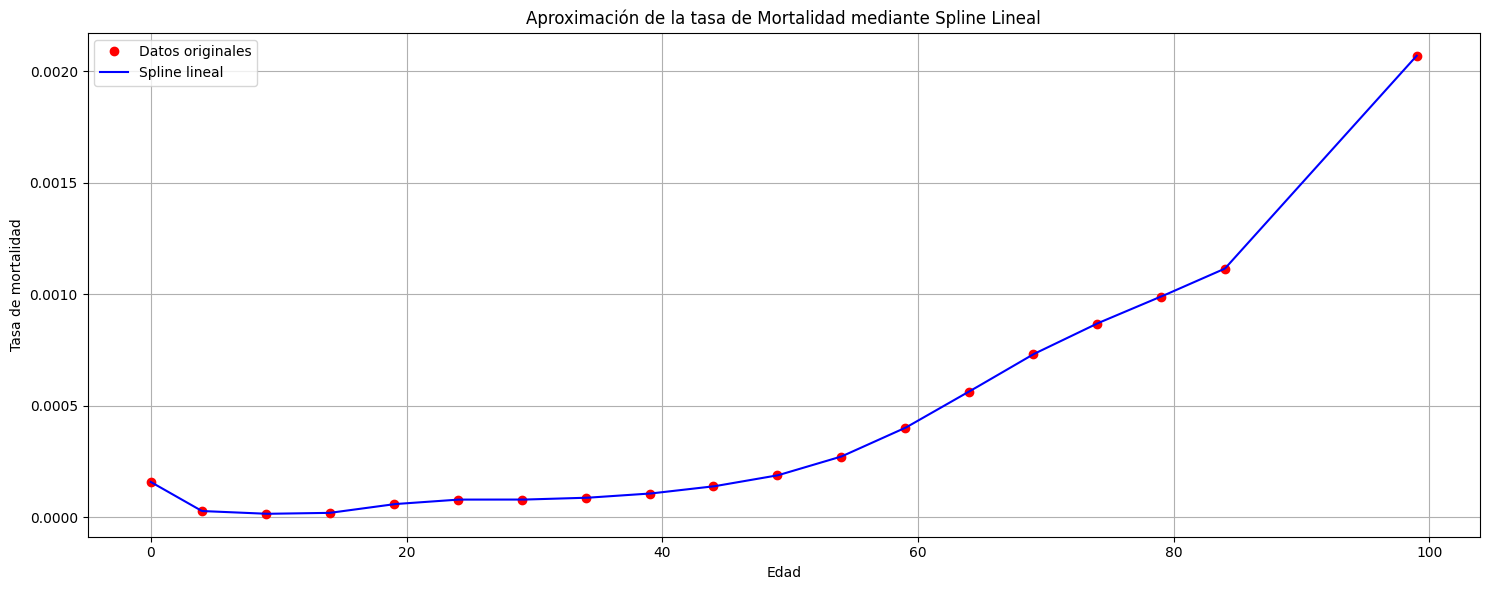

In [ ]:
edades_mortalidad = [0, 4, 9, 14, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79, 84, 99]  # Extremos superiores de los grupos de edad
tasas_medias_mortalidad = df_mortalidad.mean().tolist()

interpolacion_lineal = interp1d(edades_mortalidad, tasas_medias_mortalidad, kind='linear')

edad_fina = np.linspace(min(edades_mortalidad), max(edades_mortalidad), 1000)
tasas_finas = interpolacion_lineal(edad_fina)

plt.figure(figsize=(15, 6))
plt.plot(edades_mortalidad, tasas_medias_mortalidad, 'o', label='Datos originales', color='red')
plt.plot(edad_fina, tasas_finas, '-', label='Spline lineal', color='blue')
plt.xlabel('Edad')
plt.ylabel('Tasa de mortalidad')
plt.title('Aproximación de la tasa de Mortalidad mediante Spline Lineal')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
def mortalidad_lineal(edad):

    edades = [0, 4, 9, 14, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79, 84, 100]
    tasas = tasas_medias_mortalidad.copy()

    interpolacion_lineal = interp1d(edades, tasas, kind='linear')

    return interpolacion_lineal(edad)

In [ ]:
def evolucion_poblacional(U0, A, num_pasos):

    n = len(U0)
    U = np.zeros((num_pasos + 1, n))
    U[0, :] = U0

    for j in range(num_pasos):
        U[j + 1, :] = A @ U[j, :]

    return U

In [ ]:
def crear_matriz_rala(delta, N, b_prima, B_prima):

    num_elements = 4 * N - 4

    filas = np.zeros(num_elements, dtype=int)
    columnas = np.zeros(num_elements, dtype=int)
    valores = np.zeros(num_elements, dtype=float)

    columnas[:N] = np.arange(N)
    valores[:N] = b_prima

    filas[N:N + (N - 2)] = np.arange(1, N-1)
    columnas[N:N + (N - 2)] = np.arange(1, N-1)
    valores[N:N + (N - 2)] = B_prima[1:N-1]

    filas[N + (N - 2): N + (N - 2)*2] = np.arange(1, N-1)
    columnas[N + (N - 2): N + (N - 2) * 2] = np.arange(2, N)
    valores[N + (N - 2):N + (N - 2) * 2] = np.full(N-2, -0.5 * delta)

    filas[N + 2*(N - 2):N + 3*(N - 2)] = np.arange(1, N-1)
    columnas[N + 2*(N - 2):N + 3*(N - 2)] = np.arange(0, N-2)
    valores[N + 2*(N - 2):N + 3*(N - 2)] = np.full(N-2, 0.5 * delta)

    filas[-1] = N-1
    columnas[-1] = N-1
    valores[-1] = B_prima[-1]
    filas[-2] = N-1
    columnas[-2] = N-2
    valores[-2] = delta

    matriz_rala = coo_matrix((valores, (filas, columnas)), shape=(N, N))

    return matriz_rala


In [ ]:
año_inicial = 2010
año_final = 2022
num_pasos = 1000
h = (año_final - año_inicial) / num_pasos

edad_inicial = 0
edad_final = 99
num_edades = 100
k = 1 # 1 año

edades = np.linspace(edad_inicial, edad_final, num_edades)

In [ ]:
B = [(1 - (h * mortalidad_lineal(a))) for a in edades]
b = [natalidad_lineal(a) * k for a in edades]
delta = h/k

In [ ]:
B_prima = [0 if i == 0 else B[i] if i != (len(B)-1) else (B[i]-delta) for i in range(len(B))]
b_prima = [(b[i]*(B[0] + delta) - delta) if i == 1 else b[i]*(B[0] + delta) for i in range(len(b))]

In [ ]:
A = crear_matriz_rala(delta, num_edades, b_prima, B_prima)

In [ ]:
densid_inicial = pd.read_csv(f'Densidad_{año_inicial}.csv')
densid_inicial['Densidad'] = densid_inicial['Densidad'].str.replace(',', '.').astype(float)

densid_final = pd.read_csv(f'Densidad_{año_final}.csv')
densid_final['Densidad'] = densid_final['Densidad'].str.replace(',', '.').astype(float)

In [ ]:
U0 = densid_inicial['Densidad']
U_real = densid_final['Densidad']

U = evolucion_poblacional(U0, A, num_pasos)

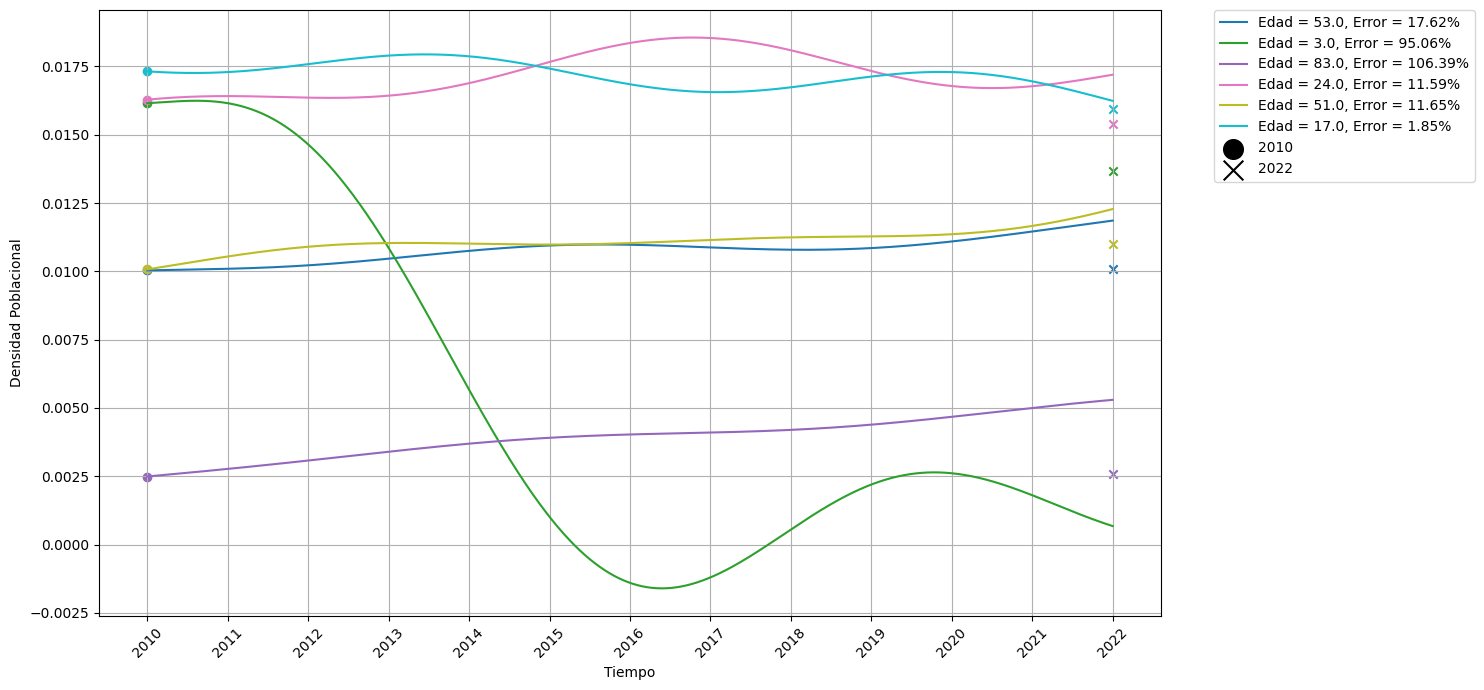

In [ ]:
indices_edades_seleccionadas = np.random.choice(len(edades), 6, replace=False)
edades_seleccionadas = edades[indices_edades_seleccionadas]

colors = plt.cm.tab10(np.linspace(0, 1, len(indices_edades_seleccionadas)))

plt.figure(figsize=(15, 7))
time_grid = np.linspace(año_inicial, año_final, num_pasos + 1)

for i, (age_index, color) in enumerate(zip(indices_edades_seleccionadas, colors)):
    U_pred_final = U[-1, age_index]
    densidad_real = U_real[age_index]
    error_porcentual = np.abs(U_pred_final - densidad_real) / densidad_real * 100

    label = f"Edad = {edades[age_index]:.1f}, Error = {error_porcentual:.2f}%"

    plt.plot(time_grid, U[:, age_index], label=label, color=color)
    plt.scatter(año_inicial, U0[age_index], color=color, marker='o')
    plt.scatter(año_final, U_real[age_index], color=color, marker='x')

plt.scatter([], [], color='black', marker='o', s=200, label=f'{año_inicial}')
plt.scatter([], [], color='black', marker='x', s=200, label=f'{año_final}')

plt.xlabel("Tiempo")
plt.ylabel("Densidad Poblacional")
plt.xticks(np.arange(año_inicial, año_final + 1, 1), rotation=45)
plt.grid()
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

plt.tight_layout()
plt.show()


In [ ]:
def calcular_error(U_final, densidad_real):
    return np.sum(np.abs(U_final - densidad_real))

def calcular_error_promedio(U_final, densidad_real):
    return np.mean(np.abs(U_final - densidad_real))

Valor óptimo de h: 0.056899
Error promedio mínimo: 0.003201
Suma de Errores mínima: 0.320091


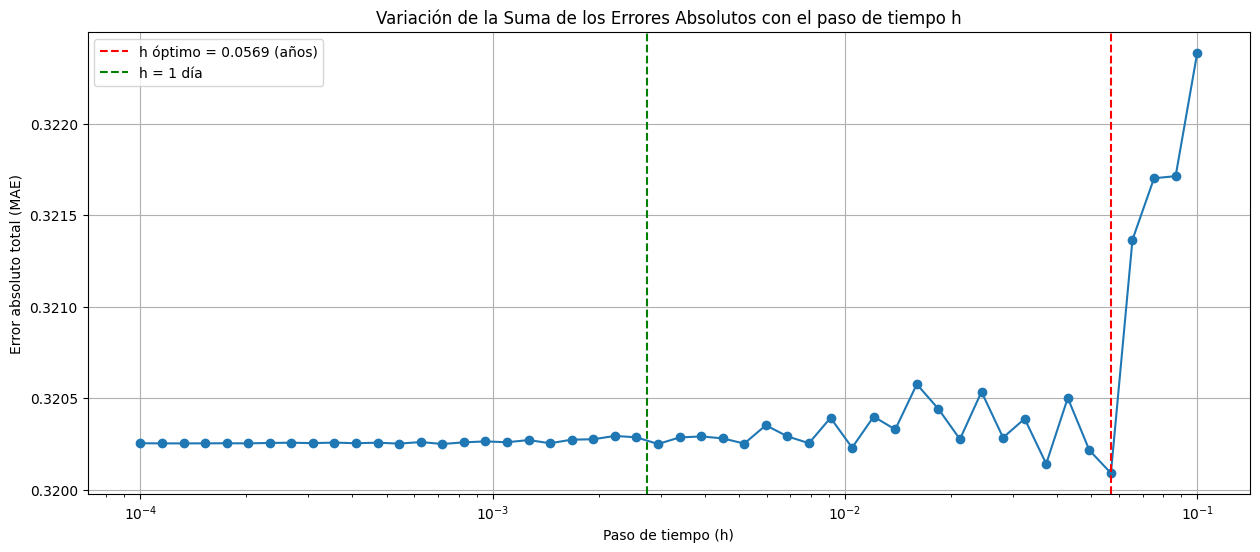

In [ ]:
h_valores = np.logspace(-4, -1, 50)
sum_errores = []
errores_promedios = []

for h in h_valores:

    num_pasos = int((año_final - año_inicial) / h)

    B = [(1 - (h * mortalidad_lineal(a))) for a in edades]
    b = [natalidad_lineal(a) for a in edades]

    delta = h / k

    B_prima = [0 if i == 0 else B[i] if i != (len(B)-1) else (B[i]-delta) for i in range(len(B))]
    b_prima = [(b[i]*(B[0] + delta) - delta) if i == 1 else b[i]*(B[0] + delta) for i in range(len(b))]

    A = crear_matriz_rala(delta, num_edades, b_prima, B_prima)
    U = evolucion_poblacional(U0, A, num_pasos)

    error = calcular_error(U[-1, :], U_real)
    error_promedio = calcular_error_promedio(U[-1, :], U_real)

    sum_errores.append(error)
    errores_promedios.append(error_promedio)

i_min = np.argmin(sum_errores)
h_optimo = h_valores[i_min]

error_prom_minimo = errores_promedios[i_min]
error_sum_minima = min(sum_errores)

print(f"Valor óptimo de h: {h_optimo:.6f}")
print(f"Error promedio mínimo: {error_prom_minimo:.6f}")
print(f"Suma de Errores mínima: {error_sum_minima:.6f}")

plt.figure(figsize=(15, 6))
plt.plot(h_valores, sum_errores, marker='o')
plt.axvline(h_optimo, color='r', linestyle='--', label=f"h óptimo = {h_optimo:.4f} (años)")
plt.axvline(1/365, color='green', linestyle='--', label=f"h = 1 día")
plt.xlabel("Paso de tiempo (h)")
plt.ylabel("Error absoluto total (MAE)")
plt.xscale("log")
plt.title("Variación de la Suma de los Errores Absolutos con el paso de tiempo h")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
h_optimo = 1/365
num_pasos_optimo = int((año_final - año_inicial) / h_optimo)

B_optimo = [(1 - (h_optimo * mortalidad_lineal(a))) for a in edades]
b_optimo = [natalidad_lineal(a) for a in edades]

delta_optimo = h_optimo / k

B_prima_optimo = [0 if i == 0 else B[i] if i != (len(B)-1) else (B[i]-delta_optimo) for i in range(len(B))]
b_prima_optimo = [(b[i]*(B[0] + delta_optimo) - delta_optimo) if i == 1 else b[i]*(B[0] + delta_optimo) for i in range(len(b))]

A_optimo = crear_matriz_rala(delta_optimo, num_edades, b_prima_optimo, B_prima_optimo)
U = evolucion_poblacional(U0, A_optimo, num_pasos_optimo)


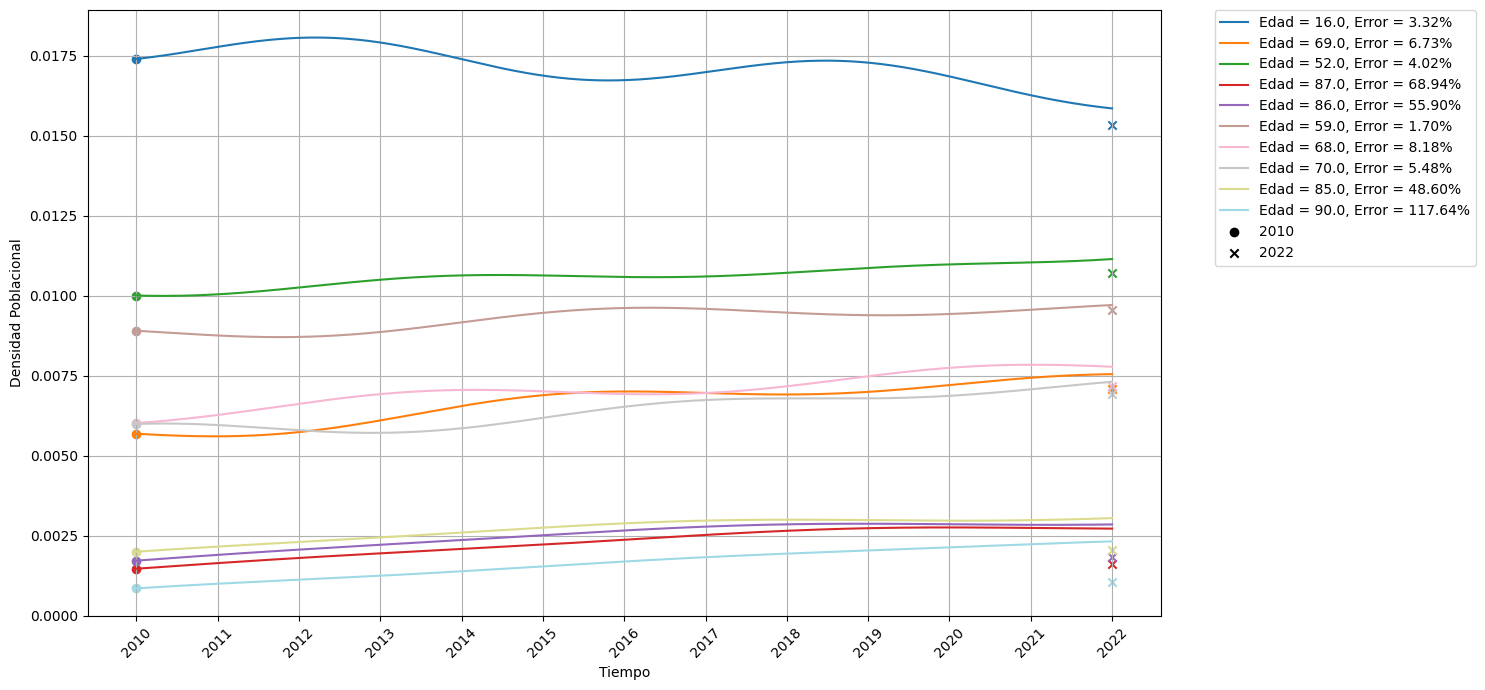

In [ ]:
selected_ages_indices = np.random.choice(len(edades), 10, replace=False)
selected_ages = edades[selected_ages_indices]

colors = plt.cm.tab20(np.linspace(0, 1, len(selected_ages_indices)))

plt.figure(figsize=(15, 7))
time_grid = np.linspace(año_inicial, año_final, num_pasos_optimo + 1)

for i, (age_index, color) in enumerate(zip(selected_ages_indices, colors)):
    U_pred_final = U[-1, age_index]
    densidad_real = U_real[age_index]
    error_porcentual = np.abs(U_pred_final - densidad_real) / densidad_real * 100

    label = f"Edad = {edades[age_index]:.1f}, Error = {error_porcentual:.2f}%"

    plt.plot(time_grid, U[:, age_index], label=label, color=color)
    plt.scatter(año_inicial, U0[age_index], color=color, marker='o')
    plt.scatter(año_final, U_real[age_index], color=color, marker='x')

plt.scatter([], [], color='black', marker='o', label=f'{año_inicial}')
plt.scatter([], [], color='black', marker='x', label=f'{año_final}')

plt.xlabel("Tiempo")
plt.ylabel("Densidad Poblacional")
plt.xticks(np.arange(año_inicial, año_final + 1, 1), rotation=45)
plt.grid()
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

plt.tight_layout()
plt.show()


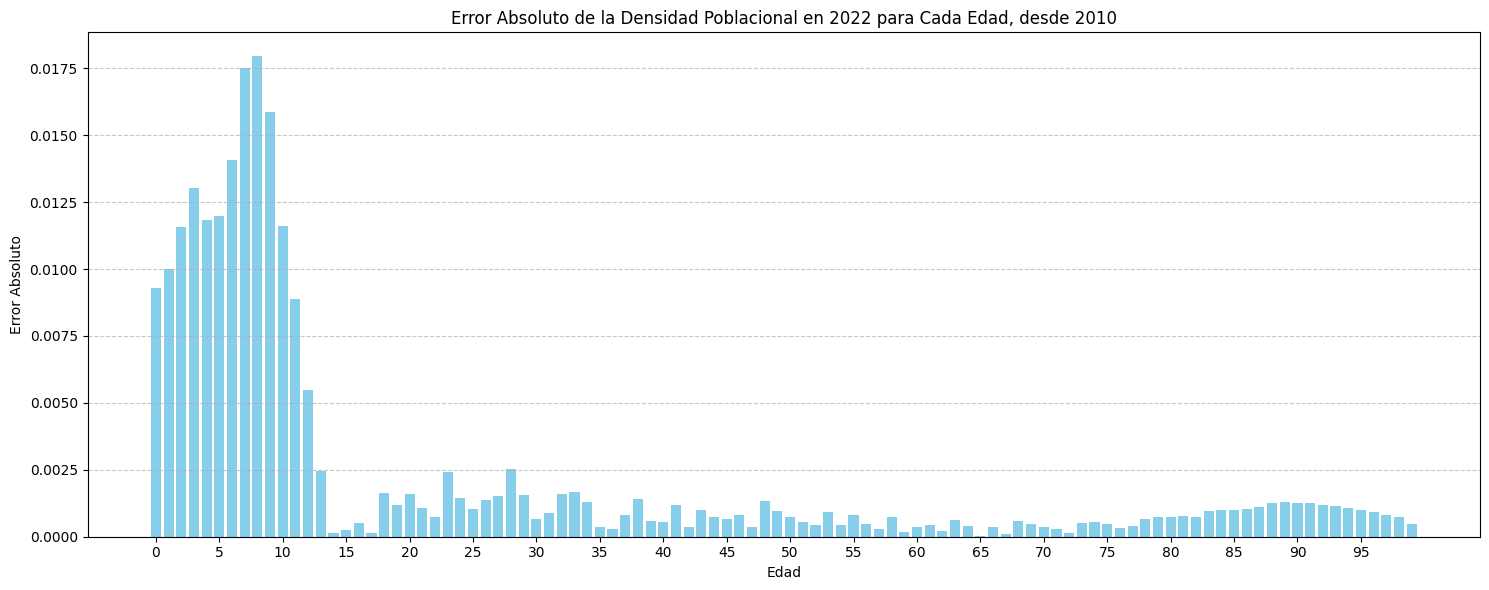

In [ ]:
errores_porcentuales = []
for age_index in range(len(edades)):
    error_porcentual = np.abs(U[-1, age_index] - U_real[age_index])
    errores_porcentuales.append(error_porcentual)

plt.figure(figsize=(15, 6))
plt.bar(edades, errores_porcentuales, color='skyblue')
plt.xlabel("Edad")
plt.ylabel("Error Absoluto")
plt.title(f"Error Absoluto de la Densidad Poblacional en {año_final} para Cada Edad, desde {año_inicial}")
plt.xticks(np.arange(0, edad_final + 1, 5))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


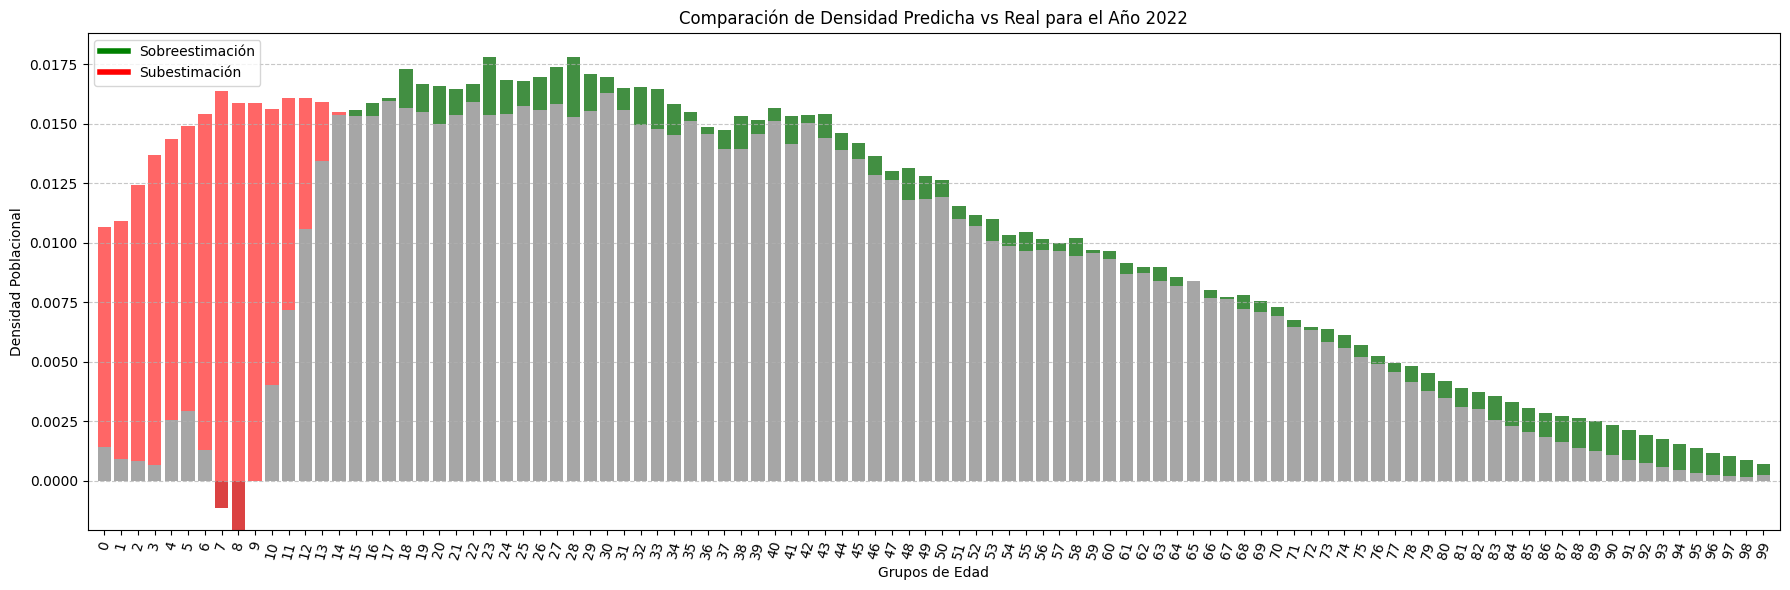

In [ ]:
selected_ages_indices = np.random.choice(len(edades), 100, replace=False)
selected_ages = edades[selected_ages_indices]

sorted_indices = np.argsort(selected_ages)
selected_ages_indices = selected_ages_indices[sorted_indices]
selected_ages = selected_ages[sorted_indices]

año_referencia = 2022
index_año_referencia = np.where(time_grid == año_referencia)[0][0]

plt.figure(figsize=(18, 6))

bar_positions = np.arange(len(selected_ages))
bar_width = 0.8

for i, age_index in enumerate(selected_ages_indices):

    U_pred_final = U[index_año_referencia, age_index]
    densidad_real = U_real[age_index]

    plt.bar(bar_positions[i], U_pred_final, width=bar_width, color='grey', alpha=0.7)

    diferencia = U_pred_final - densidad_real
    if diferencia < 0:
        plt.bar(bar_positions[i], abs(diferencia), width=bar_width, bottom=U_pred_final, color='red', alpha=0.6)
    else:
        plt.bar(bar_positions[i], diferencia, width=bar_width, bottom=densidad_real, color='green', alpha=0.6)

plt.xlim(-1, len(selected_ages))
plt.xticks(bar_positions, [f"{int(edades[idx])}" for idx in selected_ages_indices], rotation=75)
plt.xlabel("Grupos de Edad")
plt.ylabel("Densidad Poblacional")
plt.title(f"Comparación de Densidad Predicha vs Real para el Año {año_referencia}")
plt.grid(axis='y', linestyle='--', alpha=0.7)

handles = [
    plt.Line2D([0], [0], color='green', lw=4, label='Sobreestimación'),
    plt.Line2D([0], [0], color='red', lw=4, label='Subestimación'),
]
plt.legend(handles=handles, loc='upper left')

plt.tight_layout()
plt.show()


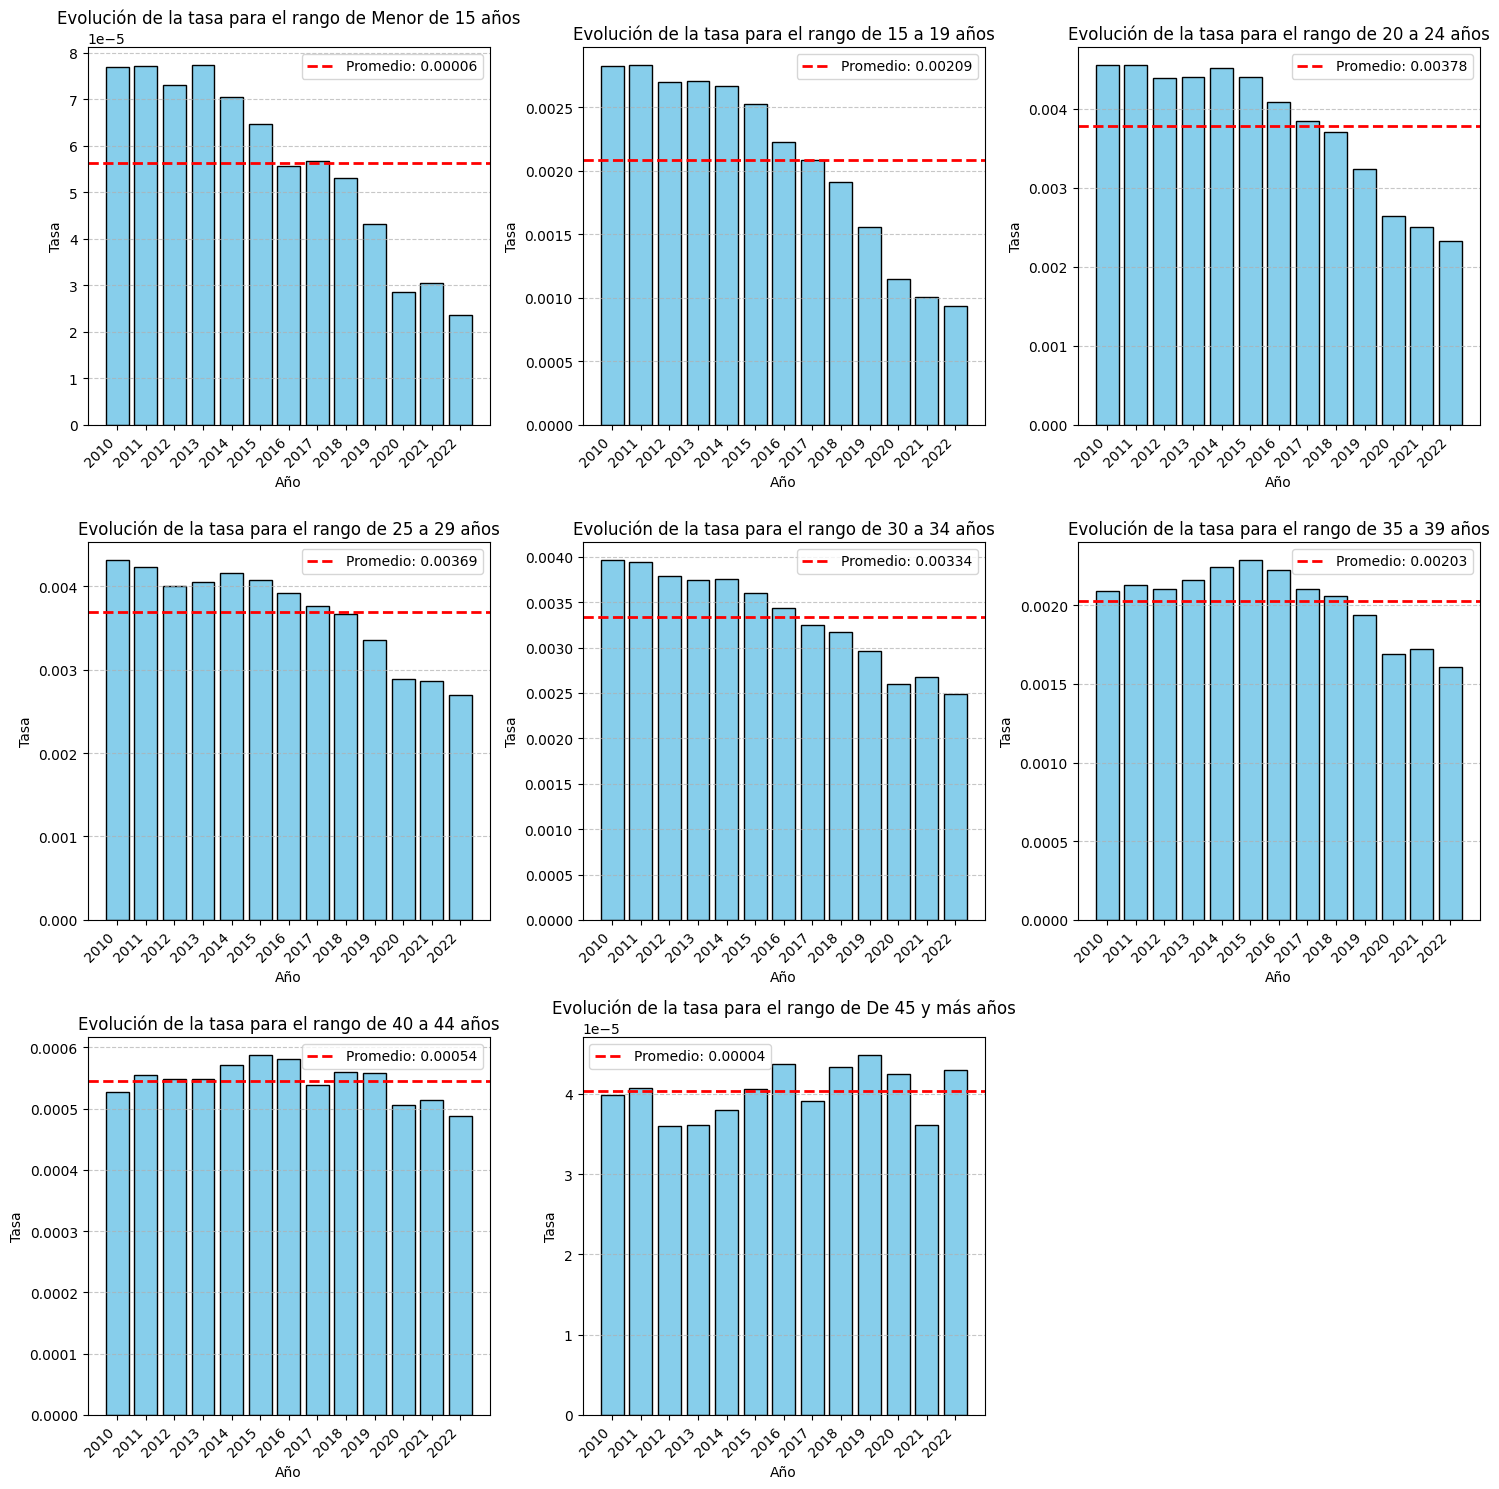

In [ ]:
graficar_porcentaje_por_edad(df_natalidad, 3)

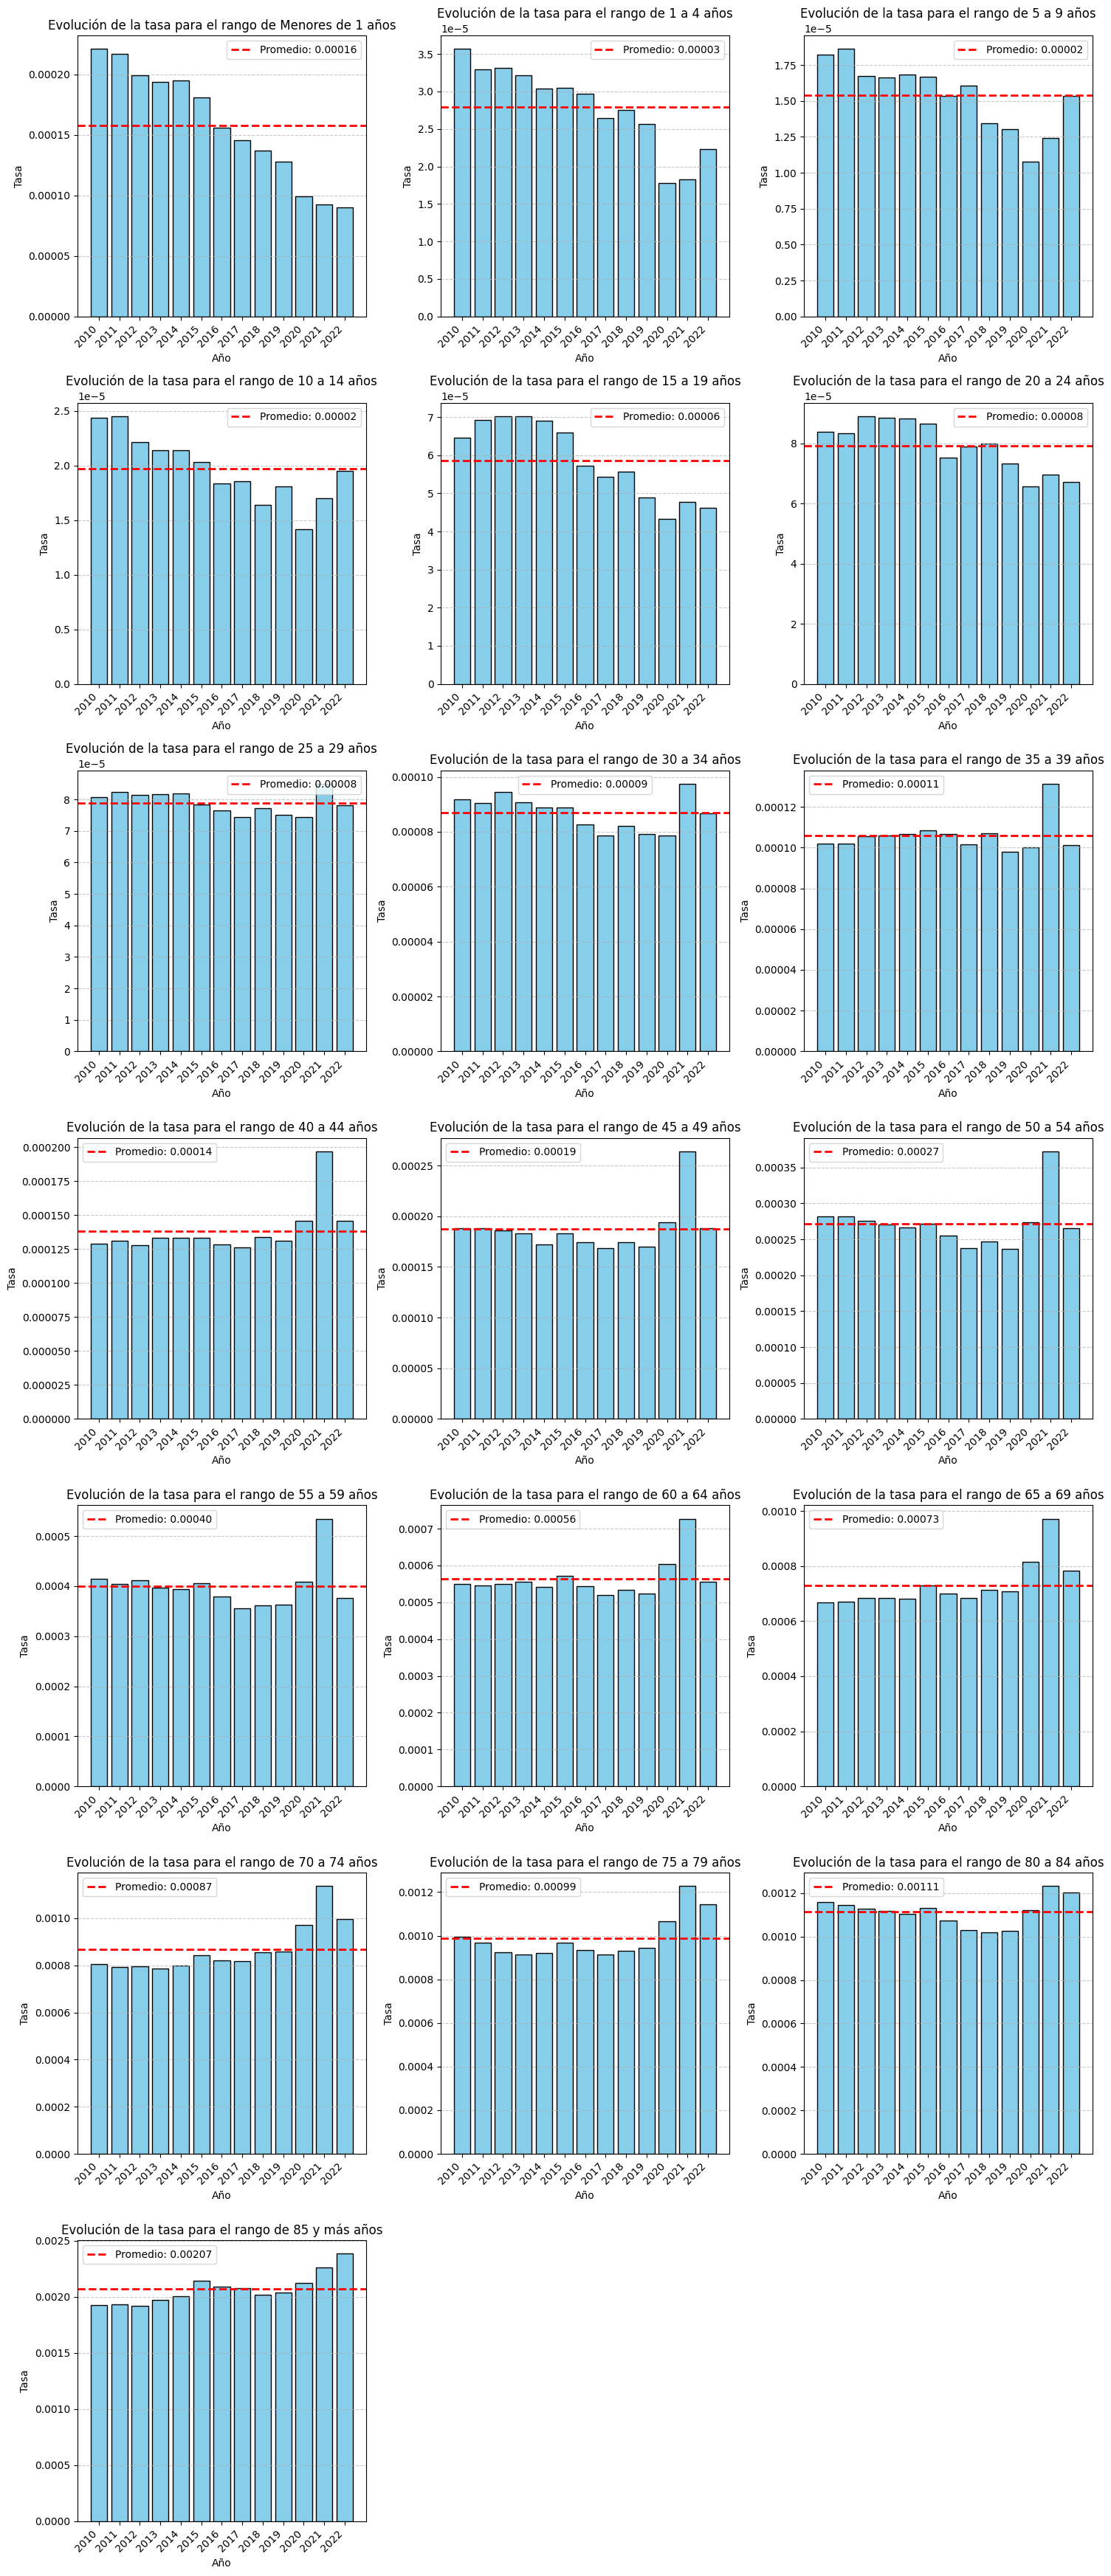

In [ ]:
graficar_porcentaje_por_edad(df_mortalidad, 3)

In [ ]:
def natalidad_lineal_por_año(edad, año):

    df_tasas = df_natalidad
    año_entero = int(np.floor(año))

    tasas = df_tasas.loc[año_entero].tolist()
    tasas.insert(0, 0)

    edades = [0, 14, 19, 24, 29, 34, 39, 44, 100]
    interpolacion_lineal = interp1d(edades, tasas, kind='linear')

    return interpolacion_lineal(edad)

def mortalidad_lineal_por_año(edad, año):

    df_tasas = df_mortalidad
    año_entero = int(np.floor(año))

    tasas = df_tasas.loc[año_entero].tolist()
    edades = [0, 4, 9, 14, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79, 84, 100]
    interpolacion_lineal = interp1d(edades, tasas, kind='linear')

    return interpolacion_lineal(edad)


In [ ]:
def evolucion_poblacional_por_año(U0, edades, año_inicial, h, k, num_steps):

    n = len(U0)
    U = np.zeros((num_steps + 1, n))
    U[0, :] = U0
    delta = h/k

    for j in range(num_steps):
        año_actual = año_inicial + j * h

        B = [(1 - (h * mortalidad_lineal_por_año(edad, año_actual))) for edad in edades]
        b = [natalidad_lineal(edad) for edad in edades]

        B_prima = [0 if i == 0 else B[i] if i != (len(B)-1) else (B[i]-delta) for i in range(len(B))]
        b_prima = [(b[i]*(B[0] + delta) - delta) if i == 1 else b[i]*(B[0] + delta) for i in range(len(b))]

        A = crear_matriz_rala(delta, n, b_prima, B_prima)

        U[j + 1, :] = A @ U[j, :]

    return U

In [ ]:
U_var = evolucion_poblacional_por_año(U0, edades, año_inicial, h_optimo, k, num_pasos)

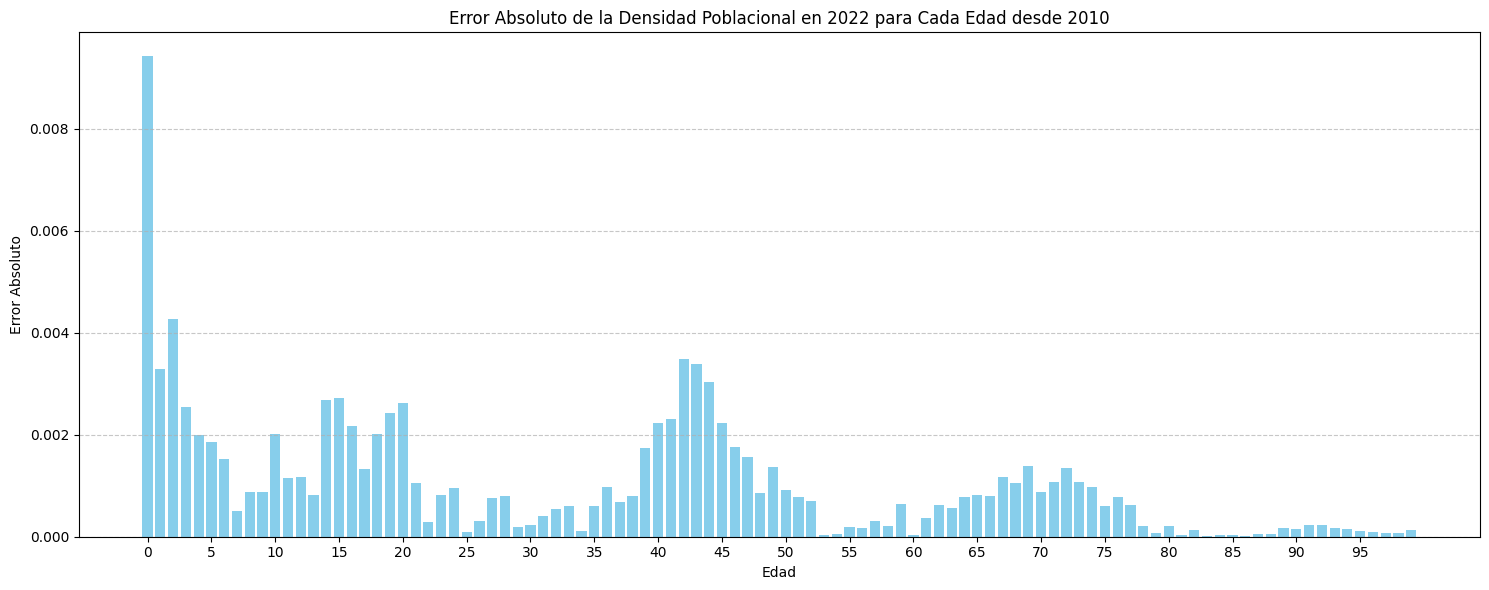

In [ ]:
errores_porcentuales = []
for age_index in range(len(edades)):

    error_porcentual = np.abs(U_var[-1, age_index] - U_real[age_index])
    errores_porcentuales.append(error_porcentual)

plt.figure(figsize=(15, 6))
plt.bar(edades, errores_porcentuales, color='skyblue')
plt.xlabel("Edad")
plt.ylabel("Error Absoluto")
plt.title(f"Error Absoluto de la Densidad Poblacional en {año_final} para Cada Edad desde {año_inicial}")
plt.xticks(np.arange(0, edad_final + 1, 5))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


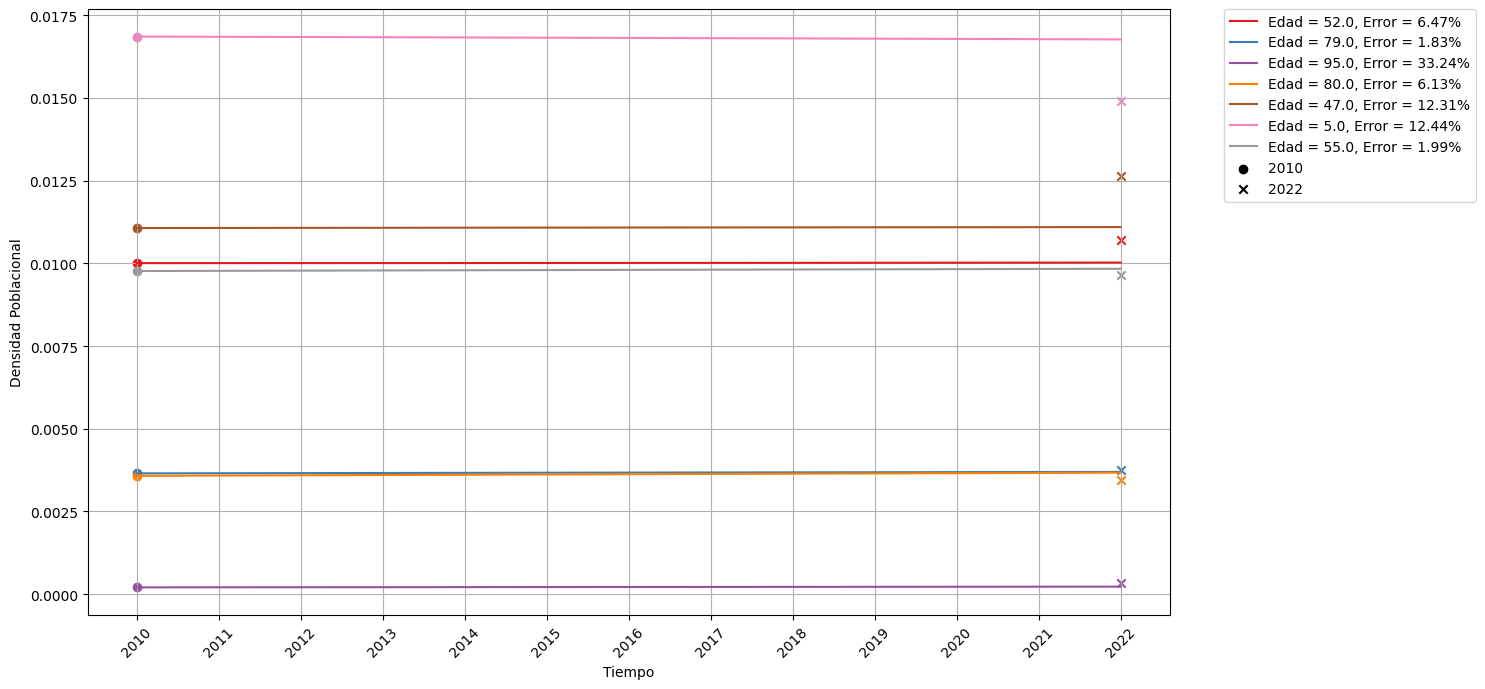

In [ ]:
selected_ages_indices = np.random.choice(len(edades), 7, replace=False)
selected_ages = edades[selected_ages_indices]

colors = plt.cm.Set1(np.linspace(0, 1, len(selected_ages_indices)))

plt.figure(figsize=(15, 7))
time_grid = np.linspace(año_inicial, año_final, num_pasos + 1)

for i, (age_index, color) in enumerate(zip(selected_ages_indices, colors)):
    U_pred_final = U_var[-1, age_index]
    densidad_real = U_real[age_index]
    error_porcentual = np.abs(U_pred_final - densidad_real) / densidad_real * 100

    label = f"Edad = {edades[age_index]:.1f}, Error = {error_porcentual:.2f}%"

    plt.plot(time_grid, U_var[:, age_index], label=label, color=color)

    plt.scatter(año_inicial, U0[age_index], color=color, marker='o')
    plt.scatter(año_final, U_real[age_index], color=color, marker='x')

plt.scatter([], [], color='black', marker='o', label=f'{año_inicial}')
plt.scatter([], [], color='black', marker='x', label=f'{año_final}')

plt.xlabel("Tiempo")
plt.ylabel("Densidad Poblacional")
plt.xticks(np.arange(año_inicial, año_final + 1, 1), rotation=45)
plt.grid()

plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

plt.tight_layout()
plt.show()


Iteracion 0
Iteracion 1
Iteracion 2
Iteracion 3
Iteracion 4
Iteracion 5
Iteracion 6
Iteracion 7
Iteracion 8
Iteracion 9
Iteracion 10
Iteracion 11
Iteracion 12
Iteracion 13
Iteracion 14
Iteracion 15
Iteracion 16
Iteracion 17
Iteracion 18
Iteracion 19
Iteracion 20
Iteracion 21
Iteracion 22
Iteracion 23
Iteracion 24
Valor óptimo de h: 0.000954
Error promedio mínimo: 0.003202
Suma de Errores mínima: 0.320153


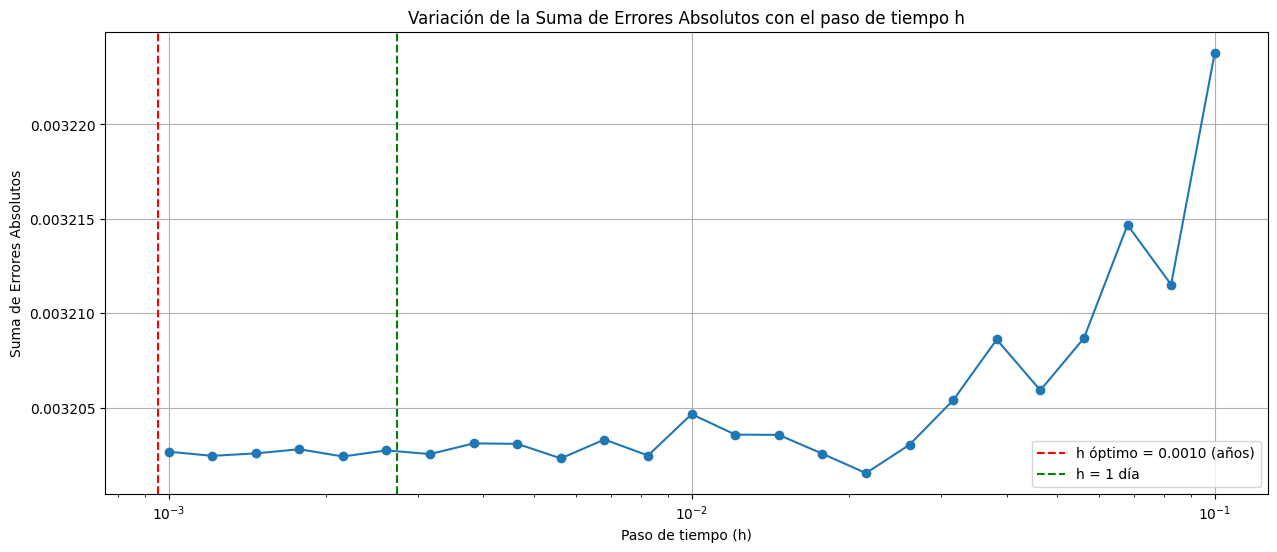

In [ ]:
h_values = np.logspace(-3, -1, 25)
sum_errores = []
errores_promedios = []

for i,h in enumerate(h_values):
    print(f"Iteracion {i}")

    num_pasos = int((año_final - año_inicial) / h)
    U_var = evolucion_poblacional_por_año(U0, edades, año_inicial, h, k, num_pasos)

    error = calcular_error(U_var[-1, :], U_real)
    error_promedio = calcular_error_promedio(U_var[-1, :], U_real)

    sum_errores.append(error)
    errores_promedios.append(error_promedio)

i_min = np.argmin(sum_errores)
h_optimo = h_valores[i_min]

error_prom_minimo = errores_promedios[i_min]
error_sum_minima = min(sum_errores)

print(f"Valor óptimo de h: {h_optimo:.6f}")
print(f"Error promedio mínimo: {error_prom_minimo:.6f}")
print(f"Suma de Errores mínima: {error_sum_minima:.6f}")

plt.figure(figsize=(15, 6))
plt.plot(h_values, errores_promedios, marker='o')
plt.axvline(h_optimo, color='r', linestyle='--', label=f"h óptimo = {h_optimo:.4f} (años)")
plt.axvline(1/365, color='green', linestyle='--', label=f"h = 1 día")
plt.xlabel("Paso de tiempo (h)")
plt.ylabel("Suma de Errores Absolutos")
plt.xscale("log")
plt.title("Variación de la Suma de Errores Absolutos con el paso de tiempo h")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
h_optimo = 1/365
num_pasos_optimo = int((año_final - año_inicial) / h_optimo)

In [ ]:
U_var = evolucion_poblacional_por_año(U0, edades, año_inicial, h_optimo, k, num_pasos_optimo)

error = calcular_error(U_var[-1, :], U_real)
error_promedio = calcular_error_promedio(U_var[-1, :], U_real)

print(f"Error Absoluto promedio: {error_promedio:.6f}")
print(f"Suma de Errores Absoluto: {error:.6f}")


Error Absoluto promedio: 0.003203
Suma de Errores Absoluto: 0.320305


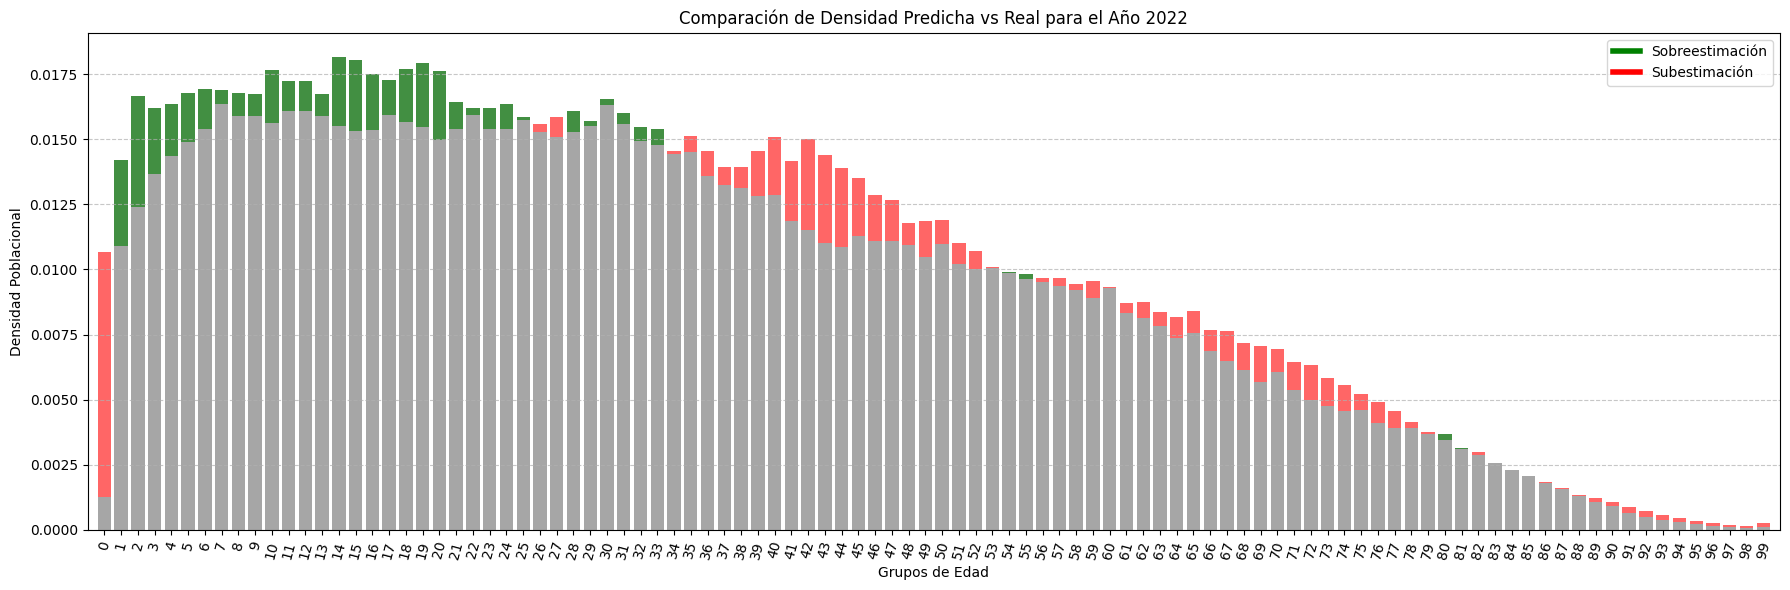

In [ ]:
selected_ages_indices = np.random.choice(len(edades), 100, replace=False)
selected_ages = edades[selected_ages_indices]

sorted_indices = np.argsort(selected_ages)
selected_ages_indices = selected_ages_indices[sorted_indices]
selected_ages = selected_ages[sorted_indices]

año_referencia = 2022
index_año_referencia = np.where(time_grid == año_referencia)[0][0]  # Encontrar el índice correspondiente

plt.figure(figsize=(18, 6))

bar_positions = np.arange(len(selected_ages))
bar_width = 0.8  # Ancho de las barras

for i, age_index in enumerate(selected_ages_indices):
    U_pred_final = U_var[index_año_referencia, age_index]
    densidad_real = U_real[age_index]

    plt.bar(bar_positions[i], U_pred_final, width=bar_width, color='grey', alpha=0.7)

    diferencia = U_pred_final - densidad_real
    if diferencia < 0:
        plt.bar(bar_positions[i], abs(diferencia), width=bar_width, bottom=U_pred_final, color='red', alpha=0.6)
    else:
        plt.bar(bar_positions[i], diferencia, width=bar_width, bottom=densidad_real, color='green', alpha=0.6)

plt.xlim(-1, len(selected_ages))
plt.xticks(bar_positions, [f"{int(edades[idx])}" for idx in selected_ages_indices], rotation=75)
plt.xlabel("Grupos de Edad")
plt.ylabel("Densidad Poblacional")
plt.title(f"Comparación de Densidad Predicha vs Real para el Año {año_referencia}")
plt.grid(axis='y', linestyle='--', alpha=0.7)

handles = [
    plt.Line2D([0], [0], color='green', lw=4, label='Sobreestimación'),
    plt.Line2D([0], [0], color='red', lw=4, label='Subestimación'),
]
plt.legend(handles=handles, loc='upper right')

plt.tight_layout()
plt.show()
